In [1343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1344]:
data = pd.read_excel("CONSUMO-2024-05.xlsx", index_col="Fecha", parse_dates=["Fecha"], date_format="%Y-%m-%d ", skiprows=6, skipfooter=3)

consume_data = data[['Gasolina regular', 'Gasolina superior', 'Gas licuado de petróleo']]
consume_data 

,Gasolina regular,Gasolina superior,Gas licuado de petróleo
Fecha,,,
2000-01-01 00:00:00,202645.20,308156.82,194410.476190
2000-02-01 00:00:00,205530.96,307766.31,174710.552381
2000-03-01 00:00:00,229499.56,331910.29,189234.066667
2000-04-01 00:00:00,210680.40,315648.08,174330.607143
2000-05-01 00:00:00,208164.34,319667.97,191745.147619
...,...,...,...
2024-01-01 00:00:00,830708.13,658083.66,548124.450000
2024-02-01 00:00:00,818740.16,654059.60,526897.850000
2024-03-01 00:00:00,870771.70,671997.05,523990.910000


In [1345]:
start_date = '2017-12-01'

consume_data['Diesel'] = np.where((data.index <= start_date),
                                    data['Diesel alto azufre'],
                                    data['Diesel bajo azufre'])

consume_data['Diesel']

/var/folders/nh/qxcg2qs54dq8v4tnbxqzpm7w0000gn/T/ipykernel_7610/2410865692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consume_data['Diesel'] = np.where((data.index <= start_date),


Fecha
2000-01-01 00:00:00     634667.06
2000-02-01 00:00:00     642380.66
2000-03-01 00:00:00     699807.25
2000-04-01 00:00:00     586803.98
2000-05-01 00:00:00     656948.20
                          ...    
2024-01-01 00:00:00    1359012.49
2024-02-01 00:00:00    1340174.42
2024-03-01 00:00:00    1393324.52
2024-04-01 00:00:00    1428143.44
2024-05-01 00:00:00    1401052.37
Name: Diesel, Length: 293, dtype: float64

In [1346]:
inicio = min(consume_data.index)
inicio
values = consume_data.loc[inicio]
print("Fecha: ", inicio, "Valor: ", values['Gasolina superior'])

Fecha:  2000-01-01 00:00:00 Valor:  308156.82


In [1347]:
fin = max(consume_data.index)
fin
values = consume_data.loc[fin]
print("Fecha: ", fin, "Valor: ", values['Gasolina superior'])

Fecha:  2024-05-01 00:00:00 Valor:  692427.94


In [1348]:
infer_frec = pd.infer_freq(consume_data['Gasolina superior'].index)
infer_frec

'MS'

In [1349]:
# Replace zero values with NaN
consume_data = consume_data.replace(0, np.nan)

# Drop rows with NaN values (which were originally zero values)
consume_data = consume_data.dropna()

/var/folders/nh/qxcg2qs54dq8v4tnbxqzpm7w0000gn/T/ipykernel_7610/2160085808.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  consume_data_yearly = consume_data.resample('Y').sum()


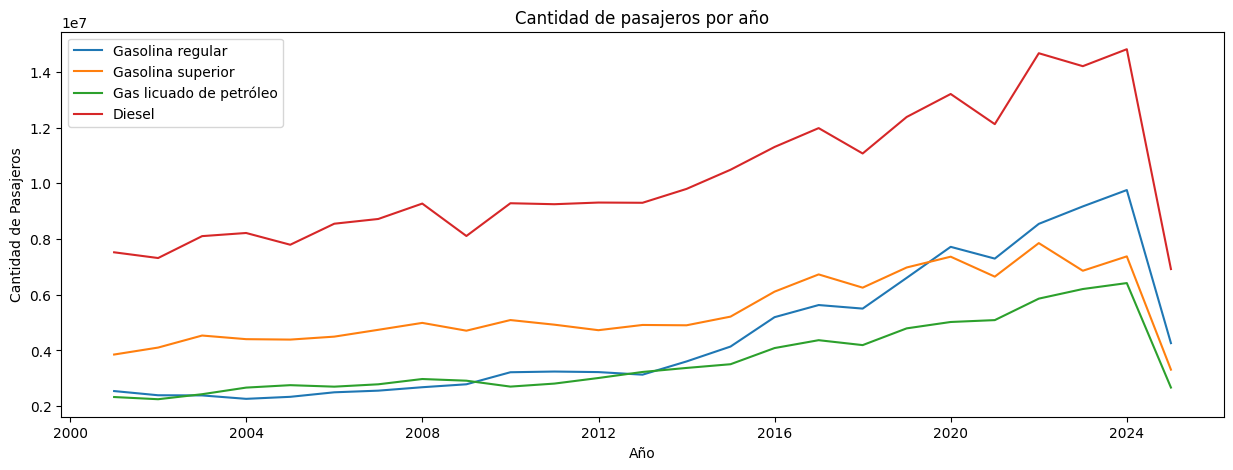

In [1350]:
import matplotlib.dates as mdates

# Assuming consume_data is already loaded

# Ensure the index is a DatetimeIndex
if not isinstance(consume_data.index, pd.DatetimeIndex):
    consume_data.index = pd.to_datetime(consume_data.index)

# Group the data by year and sum the values
consume_data_yearly = consume_data.resample('Y').sum()

# Plot the aggregated data
plt.plot(consume_data_yearly)

# Set the title and labels
plt.gca().set(title="Cantidad de pasajeros por año", xlabel="Año", ylabel="Cantidad de Pasajeros")

# Format the x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add a legend
plt.legend(consume_data.columns)

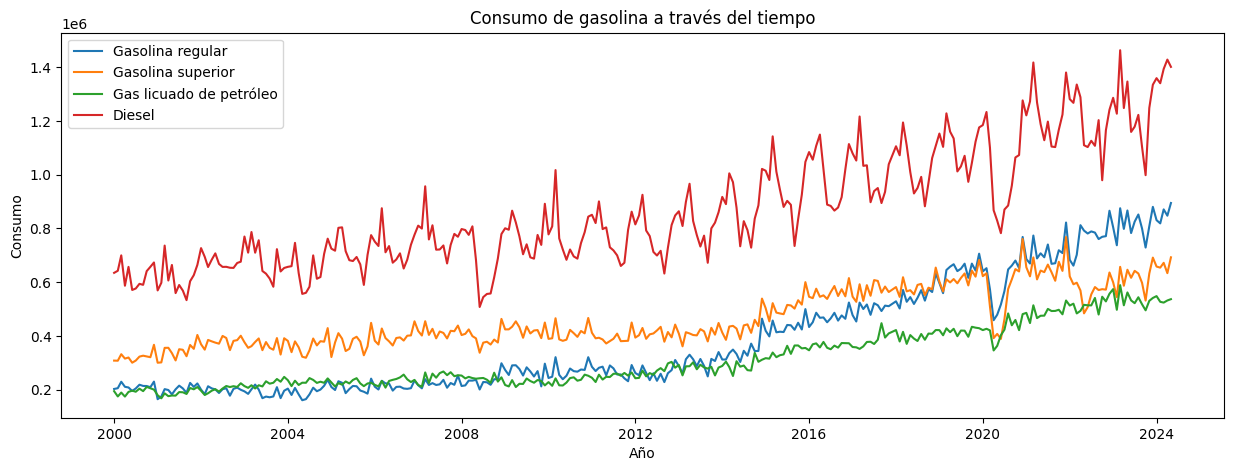

In [1351]:
plt.plot(consume_data)
plt.gca().set(title="Consumo de gasolina a través del tiempo", xlabel="Año", ylabel="Consumo")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend(consume_data.columns)
plt.show()

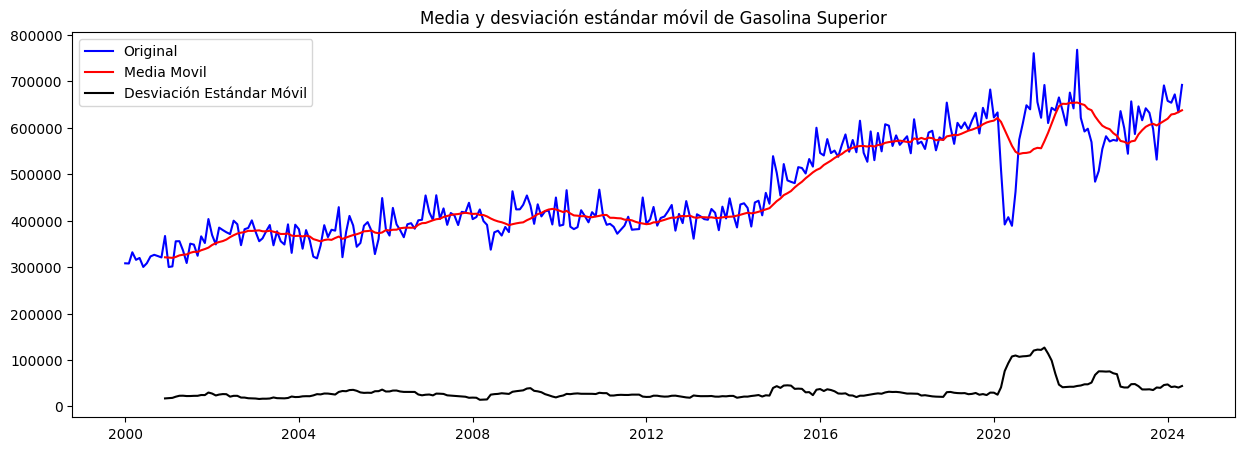

In [1352]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = consume_data['Gasolina superior'].rolling(window=12).mean()
deMovil = consume_data['Gasolina superior'].rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(consume_data['Gasolina superior'], color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil de Gasolina Superior')
plt.show(block=False)

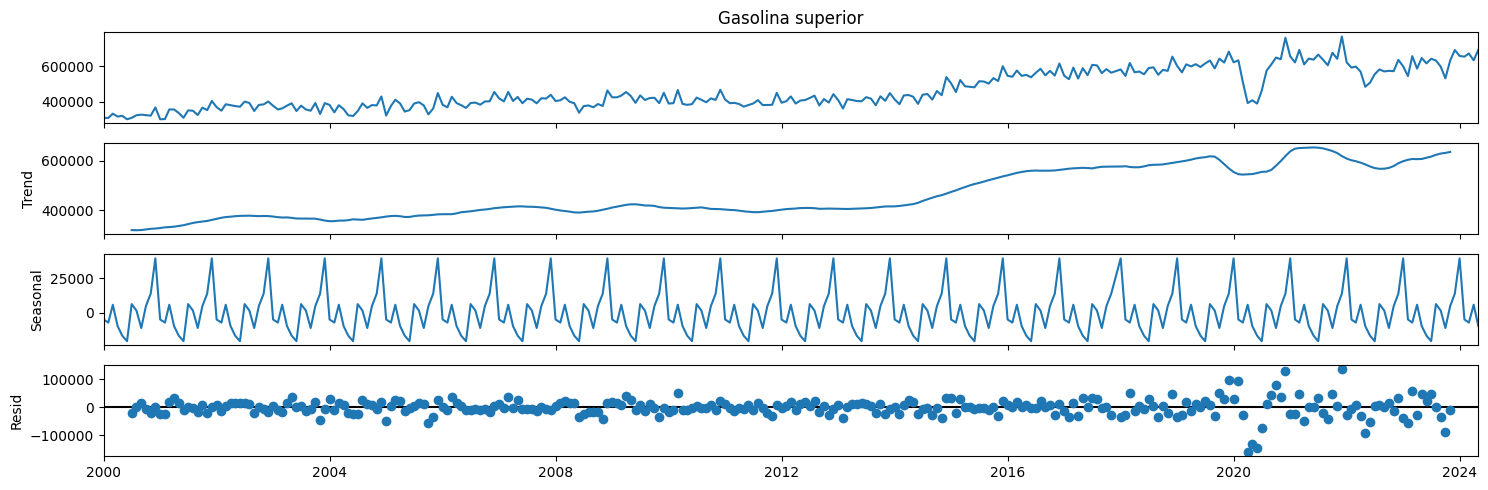

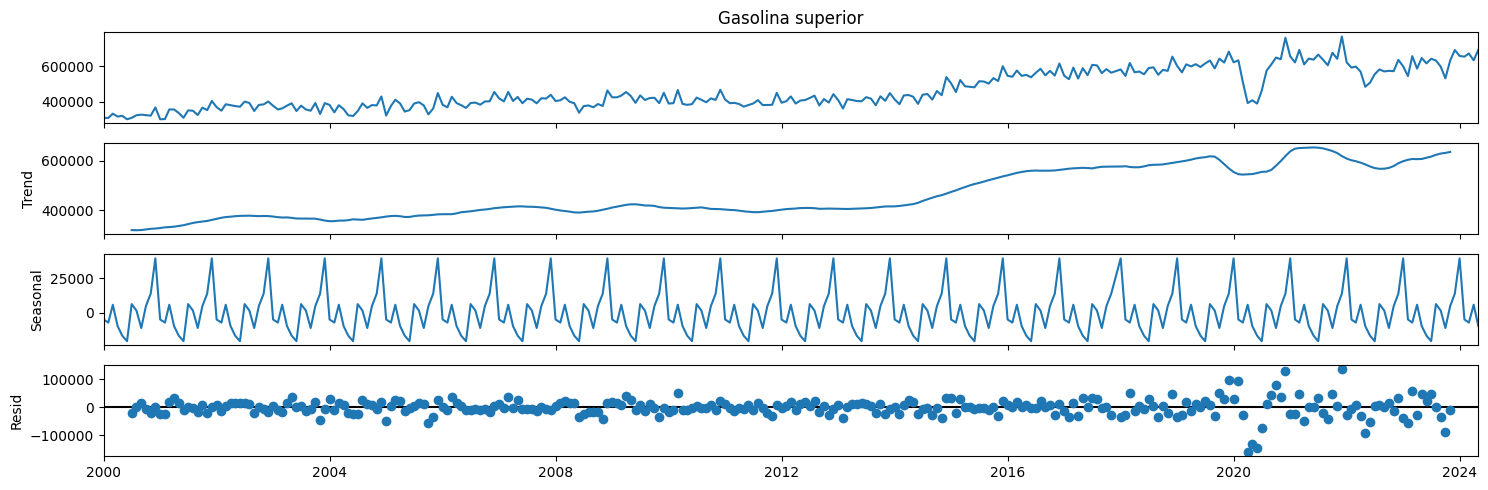

In [1353]:
descomposicion = seasonal_decompose(consume_data['Gasolina superior'], model='additive', period=12)
descomposicion.plot()

In [1354]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(consume_data['Gasolina superior'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -0.654270
p-value                        0.858242
# de retardos usados          12.000000
# de observaciones usadas    279.000000
Critical Value (1%)           -3.454008
Critical Value (5%)           -2.871956
Critical Value (10%)          -2.572320
dtype: float64


In [1355]:
consume_data = consume_data['Gasolina superior']

train_consume_data = consume_data[:'2021']
test_consume_data = consume_data['2021':]

consume_data_log = np.log(train_consume_data)

<Axes: xlabel='Fecha'>

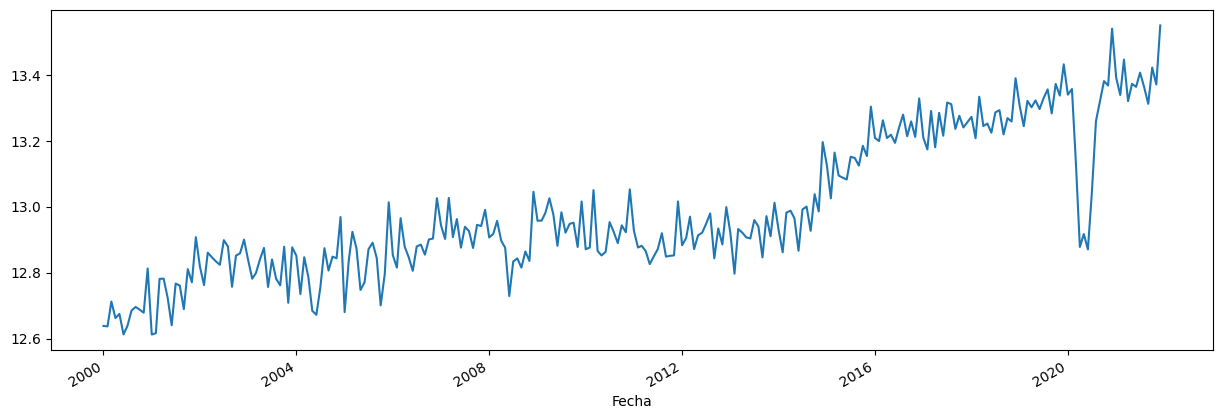

In [1356]:
consume_data_log.plot()

In [1357]:
print('Resultados del Test de Dickey Fuller')
consume_data_diff = train_consume_data.diff()
consume_data_diff.dropna(inplace=True)
dfTest = adfuller(consume_data_diff, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba       -6.236495e+00
p-value                      4.811381e-08
# de retardos usados         1.100000e+01
# de observaciones usadas    2.500000e+02
Critical Value (1%)         -3.456781e+00
Critical Value (5%)         -2.873172e+00
Critical Value (10%)        -2.572969e+00
dtype: float64


<Axes: xlabel='Fecha'>

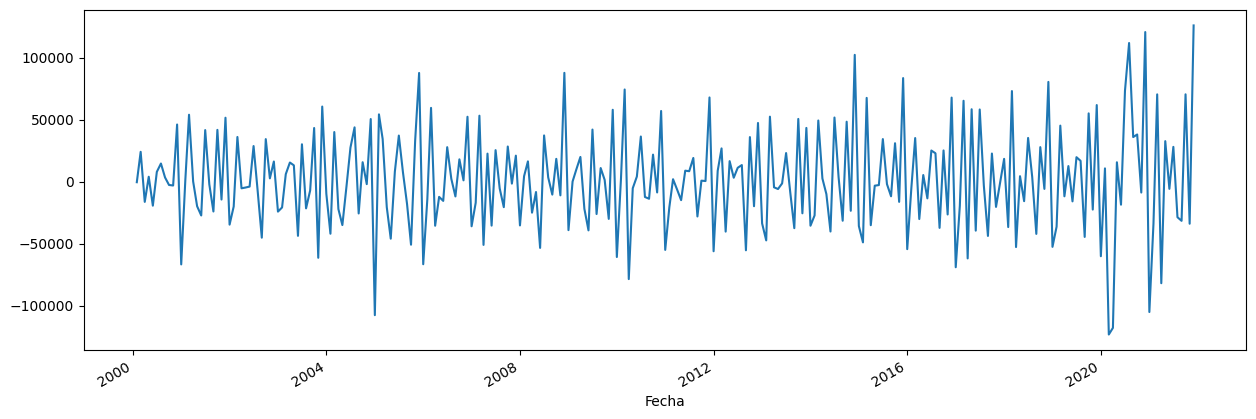

In [1358]:
consume_data_diff.plot()

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

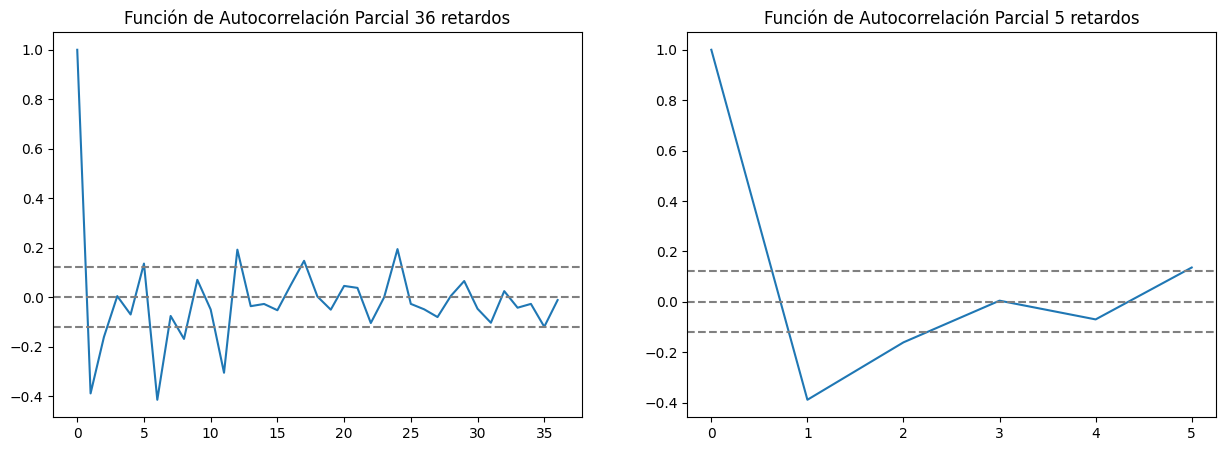

In [1359]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.subplot(121)
plt.plot(pacf(consume_data_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(consume_data_diff, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

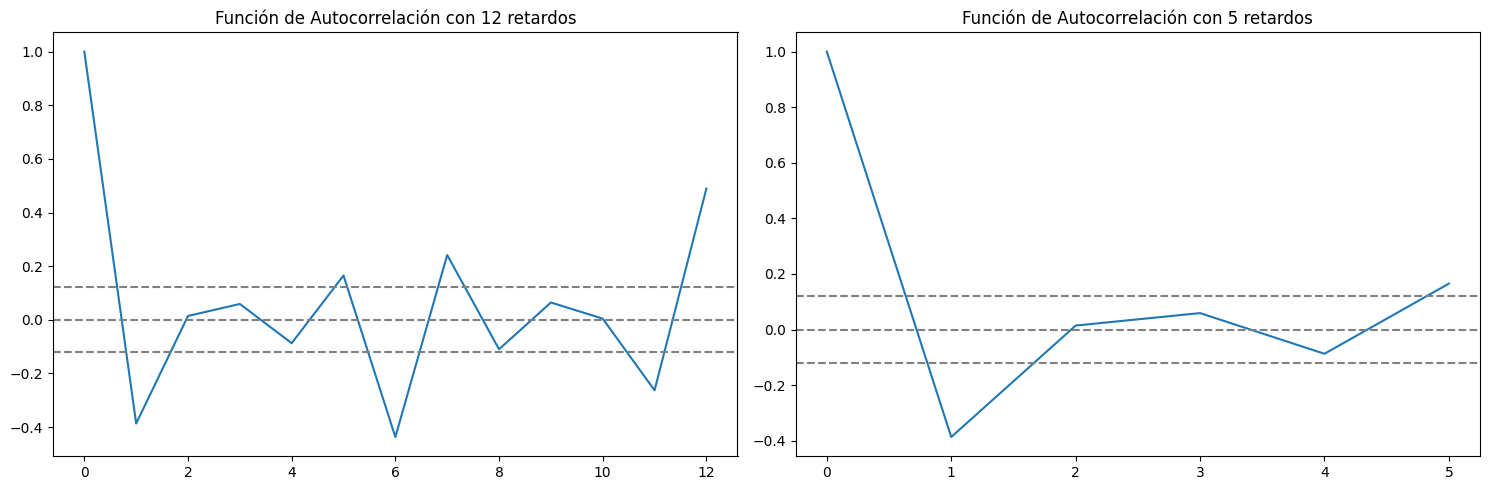

In [1360]:

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(consume_data_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(consume_data_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

In [1361]:
consume_data_log_D = consume_data_log.diff(12)
consume_data_log_D.dropna(inplace=True)

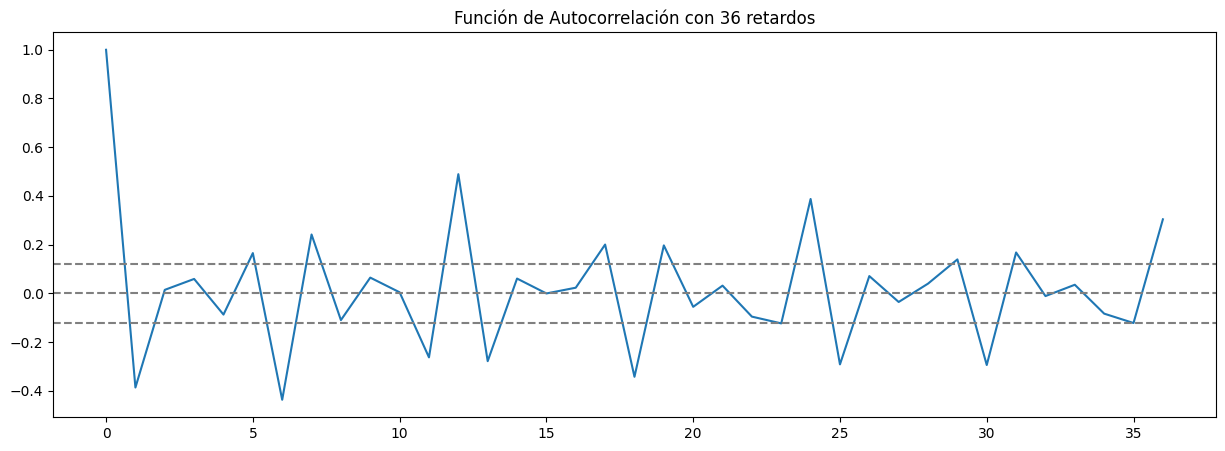

In [1362]:
plt.plot(acf(consume_data_diff,nlags=36,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 36 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

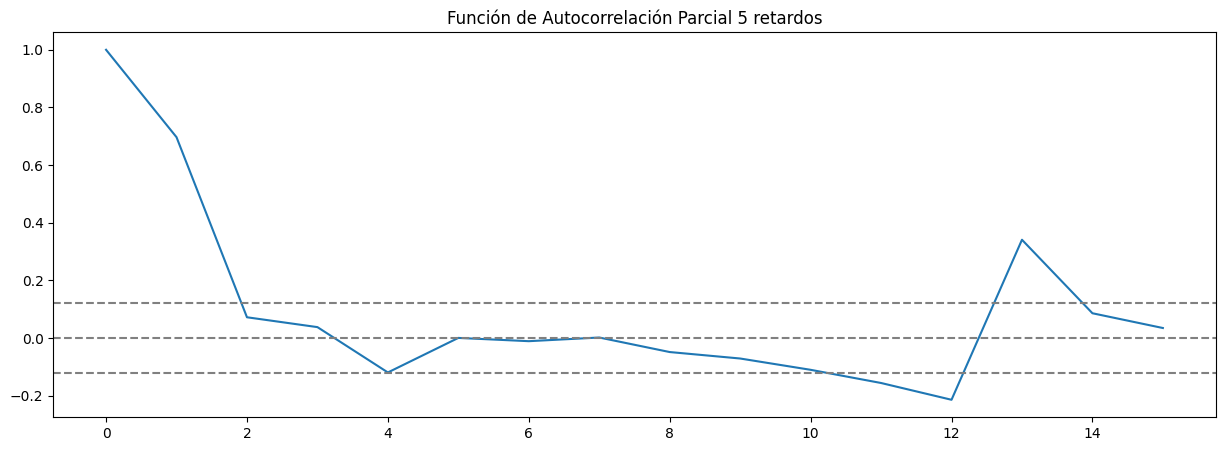

In [1363]:

plt.plot(pacf(consume_data_log_D, nlags=15))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(consume_data_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')


P = 2
D = 1
Q = 0

In [1364]:
modelo111 = SARIMAX(consume_data, order=(1,1,1), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m111 = modelo111.fit()
print(resultado_m111.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08681D+01    |proj g|=  4.67532D-02

At iterate    5    f=  1.08658D+01    |proj g|=  9.97551D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     11      1     0     0   4.818D-06   1.087D+01
  F =   10.865663865399029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [1365]:
modelo211 = SARIMAX(consume_data, order=(2,1,1), seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
resultado_m211 = modelo211.fit()
print(resultado_m211.summary().tables[1])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19096D+01    |proj g|=  1.98242D-01


 This problem is unconstrained.



At iterate    5    f=  1.09191D+01    |proj g|=  1.33440D-01

At iterate   10    f=  1.08951D+01    |proj g|=  4.54423D-02

At iterate   15    f=  1.08950D+01    |proj g|=  1.10925D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     25      1     0     0   1.109D-05   1.089D+01
  F =   10.894951222422598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3932      0.071      5.546      0.000       0.254       0.532


In [1366]:
modelo112 = SARIMAX(consume_data, order=(1,1,2), seasonal_order=(2,1,0,12), enforce_stationarity=False, enforce_invertibility=False)

resultado_m112 = modelo112.fit()
print(resultado_m112.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03804D+01    |proj g|=  3.48069D-02


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  1.03786D+01    |proj g|=  2.34269D-03

At iterate   10    f=  1.03762D+01    |proj g|=  4.12745D-03

At iterate   15    f=  1.03762D+01    |proj g|=  6.51141D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     18      1     0     0   6.511D-06   1.038D+01
  F =   10.376166158476337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1817      0.645     -0.282      0.778      -1.445       1.082


In [1367]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 111=",resultado_m111.aic)
print("Modelo 211=",resultado_m211.aic)
print("Modelo 112=",resultado_m112.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 111=",resultado_m111.bic)
print("Modelo 211=",resultado_m211.bic)
print("Modelo 112=",resultado_m112.aic)

Resultados de AIC (Akaike information criterion)
Modelo 111= 6353.547697393033
Modelo 211= 6372.651513894798
Modelo 112= 6071.681036550181
Resultados de BIC (Bayesian information criterion)
Modelo 111= 6367.881682628159
Modelo 211= 6390.550163024729
Modelo 112= 6071.681036550181


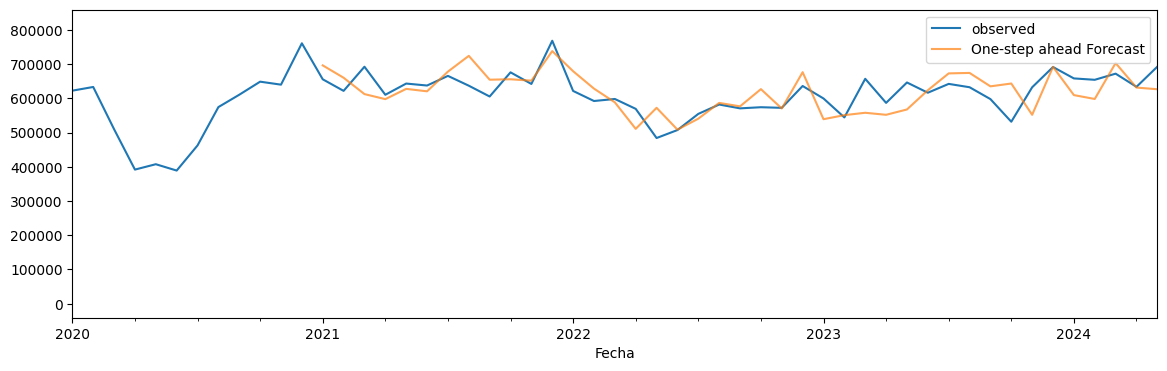

In [1368]:
pred = resultado_m112.get_prediction(start=test_consume_data.index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = consume_data['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

pred